In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("Input\OnlineRetail.csv",encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

data['InvoiceYearMonth']=data['InvoiceDate'].map(lambda date: 100 * date.year + date.month)

data['Revenue']=data['UnitPrice'] * data['Quantity']

tx_revenue=data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

tx_revenue.head(14)


,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


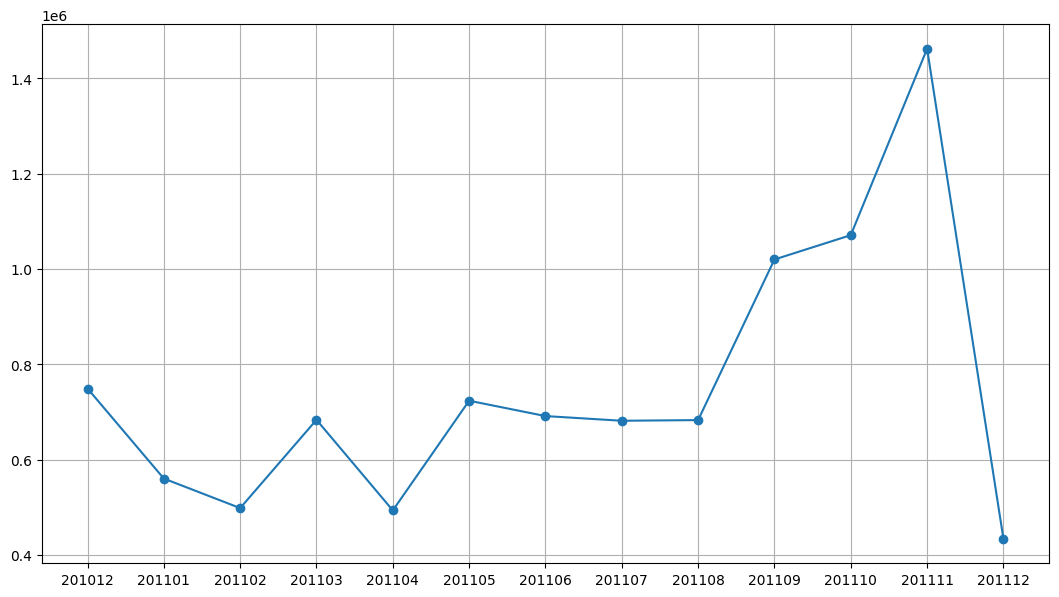

In [5]:
plt.figure(figsize=(13,7))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype=str), tx_revenue['Revenue'].to_numpy(dtype=int),marker='o')

plt.grid()
plt.show()

In [6]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head(12)

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


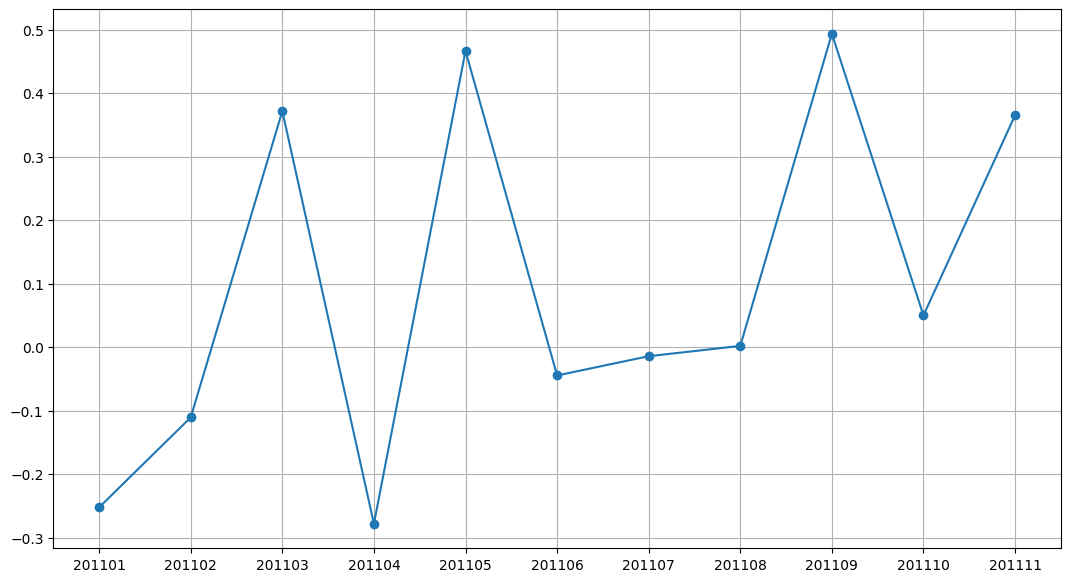

In [7]:
plt.figure(figsize=(13,7))
plt.plot(tx_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'].to_numpy(dtype=str),
          tx_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'].to_numpy(),marker='o')

plt.grid()
plt.show()

In [8]:
#creating a new dataframe with UK customers only
tx_uk = data.query("Country=='United Kingdom'")

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


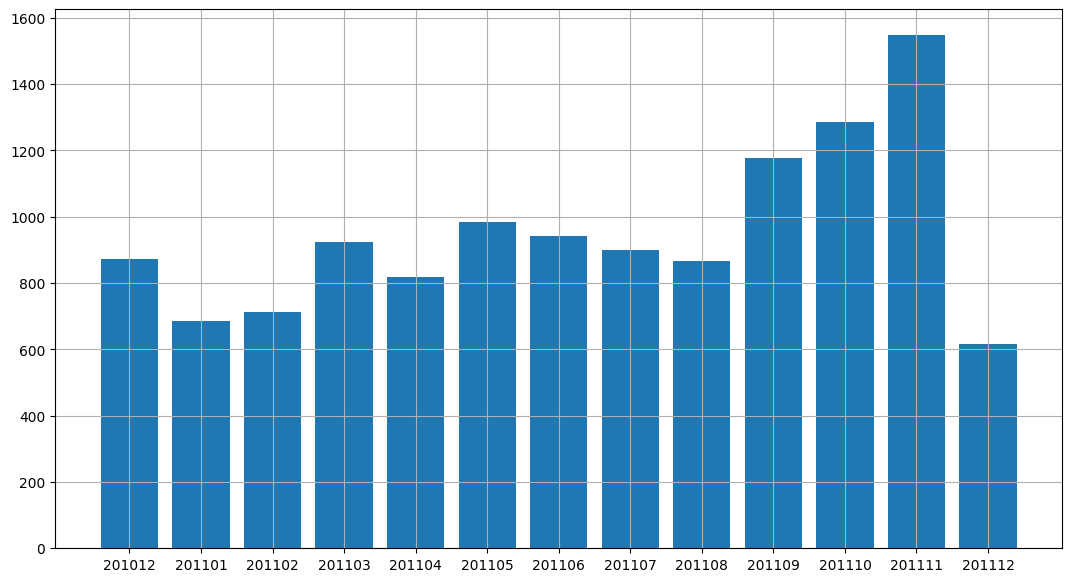

In [9]:
plt.figure(figsize=(13,7))
plt.bar(tx_monthly_active['InvoiceYearMonth'].to_numpy(dtype=str),tx_monthly_active['CustomerID'].to_numpy())

plt.grid()
plt.show()

In [10]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
tx_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


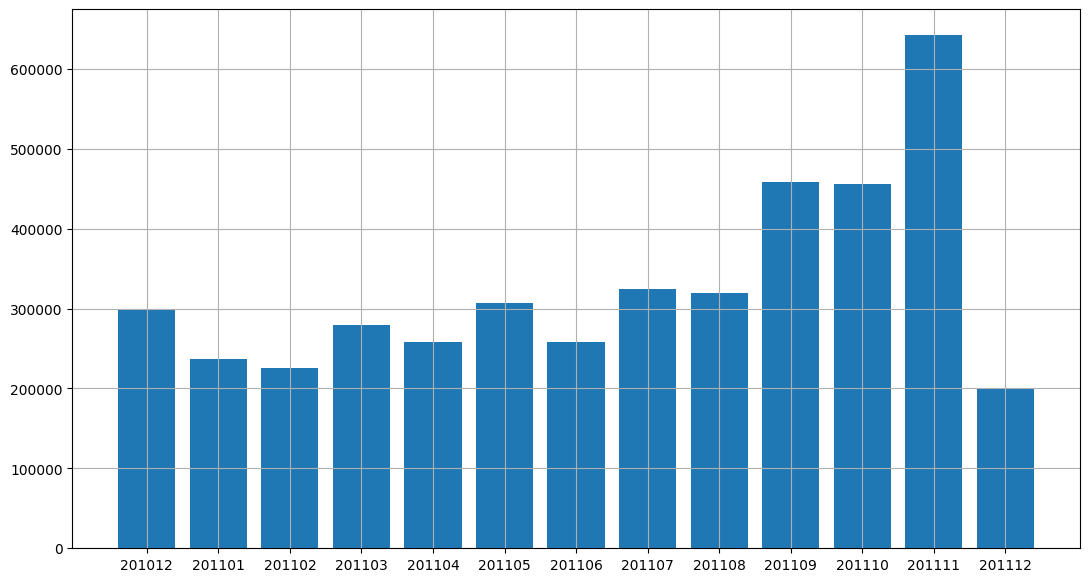

In [11]:
plt.figure(figsize=(13,7))
plt.bar(tx_monthly_sales['InvoiceYearMonth'].to_numpy(dtype=str),tx_monthly_sales['Quantity'].to_numpy())

plt.grid()
plt.show()

In [12]:
# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

#print the dataframe
tx_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


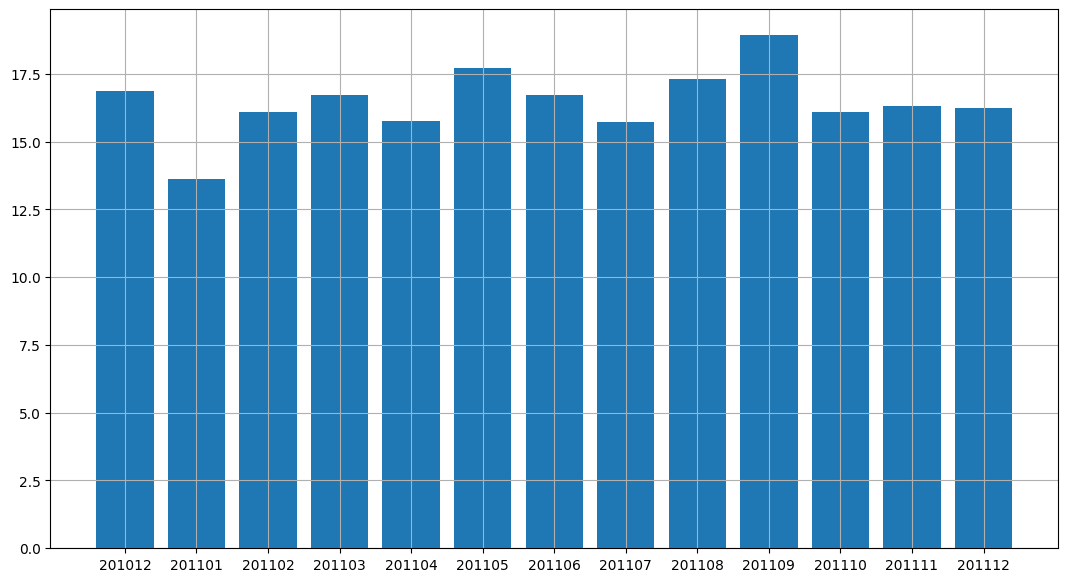

In [13]:
plt.figure(figsize=(13,7))
plt.bar(tx_monthly_order_avg['InvoiceYearMonth'].to_numpy(dtype=str),tx_monthly_order_avg['Revenue'].to_numpy())

plt.grid()
plt.show()

New Costumer VS Existing costumer: 

In [14]:

#create a dataframe contaning CustomerID and first purchase date
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')

tx_uk.head()

#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

#filtering the dates and plot the result
tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")


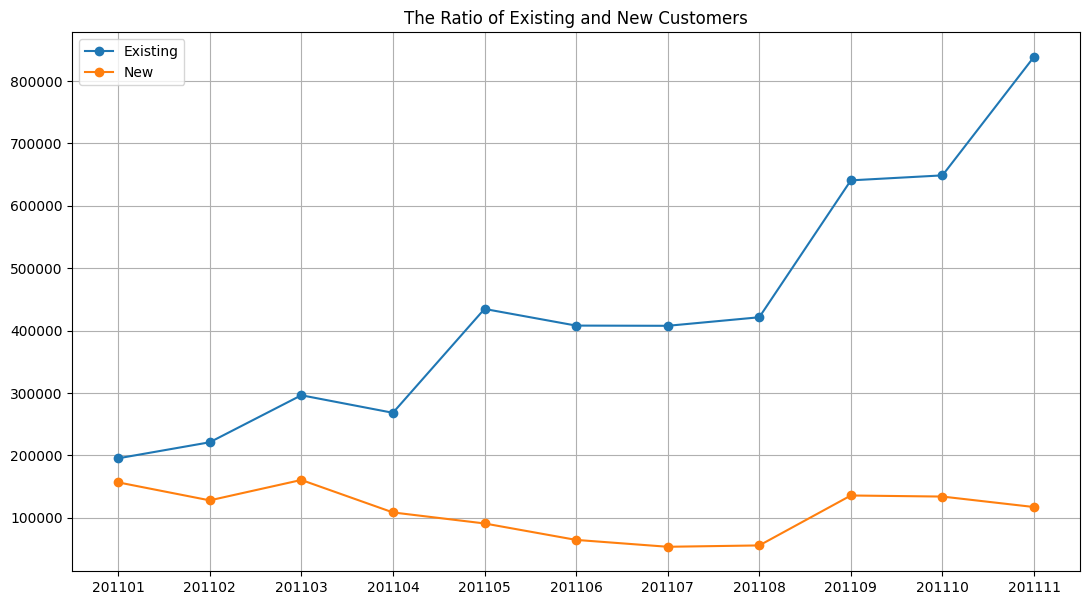

In [23]:
plt.figure(figsize=(13,7))

plt.plot(tx_user_type_revenue.query("UserType=='Existing'")['InvoiceYearMonth'].to_numpy(dtype=str),tx_user_type_revenue.query("UserType=='Existing'")['Revenue'].to_numpy(),marker='o')

plt.plot(tx_user_type_revenue.query("plt.title("The Ratio of Existing and New Customers")UserType=='New'")['InvoiceYearMonth'].to_numpy(dtype=str),tx_user_type_revenue.query("UserType=='New'")['Revenue'].to_numpy(),marker='o')

plt.legend(('Existing','New'))
plt.grid()
plt.show()

 درامد فروشگاه از مشتری های قدیمی روند افزایشی دارد اما درآمد فروشگاه از مشتری های جدید کم است و حتی کمی روند کاهشی هم دارد

پس نسبت مشتری های جدید به مشتری های قدیمی در هر ماه را بدست می آوریم 

In [16]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


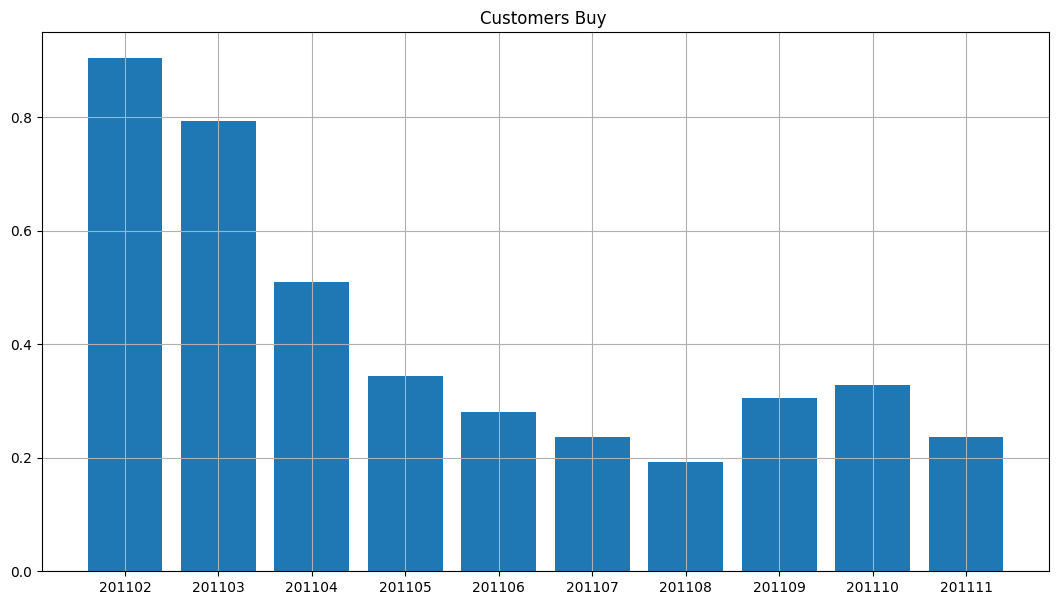

In [24]:

plt.figure(figsize=(13,7))
plt.bar(tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),
        tx_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'].to_numpy())

plt.title("Customers Buy ")
plt.grid()
plt.show()



 بررسی می کنیم که چند درصد از مشتری های هر ماه مربوط به ماه قبل بوده اند

چون از تابع گروپ بای استفاه کردیم در واقع جمع خرید هر ماه یک مشتری را بدست اوردیم و جلوی اسم آن ماه و جلوی نام آن مشتری نوشتیم

هر سطر تشکیل می شود از نام مشتری ، شماره ی ماهی که خرید کرده و کل مبلغ خرید

 نام هر مشتری در جلوی هر ماه درصورتی که در ان ماه خرید کرده باشد، فقط یک بار می آید. چون کل مبلغ خرید محاسبه شده است

 مشخص می کنیم که در هر ماه چه مشتری هایی خرید کرده اند. در واقع یک ماتریس به ما می دهد که ستون هایش ماه های سال است 
و سطرهایش مشتری ها هستند

در جلوی نام هر مشتری و در زیر هر ستون، در صورتی که آن مشتری در آن ماه خرید کرده باشد، عدد یک نوشته می شود 
و در غیر این صورت عدد صفر نوشته می شود


In [18]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head(5)




InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


برای محاسبه میزان ماندگاری مشتری به صورت ماهانه با استفاده از ماتریس بالا لیستی از دیکشنری ها تشکیل می دهیم که با استفاده از ان یک 
دیتا فریم تشکیل دهیم و اطلاعات مورد نیاز را با استفاده از کتابخانه پانداس بدست آوریم

هر دیکشنری شامل شماره ماه و تعداد کل مشتری های آن ماه و تعداد مشتری هایی که آن ماه و ماه پیش از فروشگاه خرید کرده اند

سپس دیتا فریم را تشکیل می دهیم و یک ستون جدید تشکیل می دهیم که می شود: تعداد مشتری های مشترک این ماه و ماه پیش تقسیم بر تعداد کل مشتری های این ماه

In [19]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[2:]
print(months)
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']


Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')


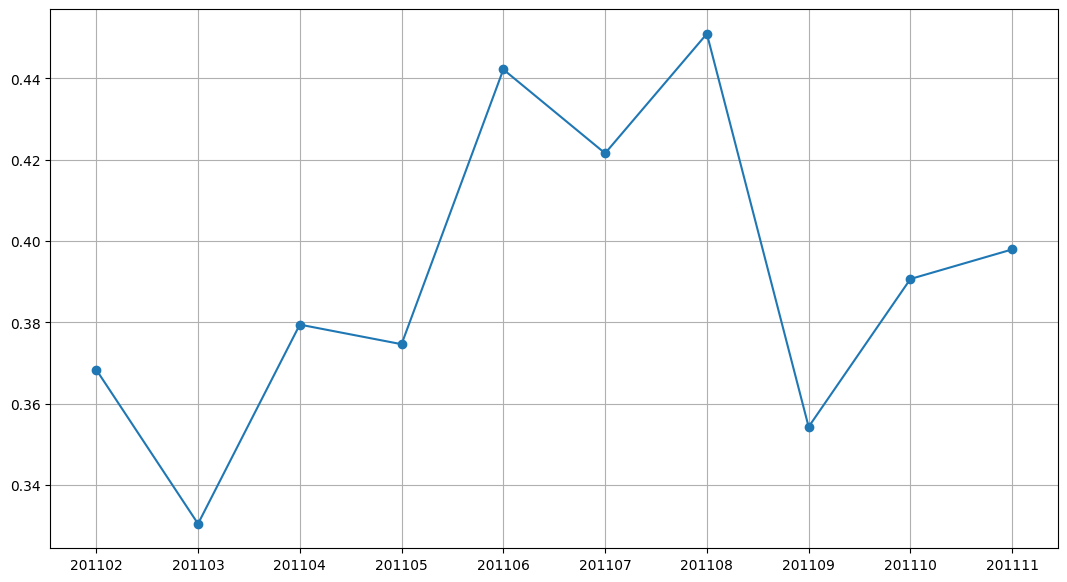

In [20]:
plt.figure(figsize=(13,7))

plt.plot(tx_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'].to_numpy(dtype=str),
         tx_retention.query("InvoiceYearMonth<201112")['RetentionRate'].to_numpy(),marker='o')

plt.grid()
plt.show()

In [21]:
#create our retention table again with crosstab() and add firs purchase year month view
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()
tx_retention = pd.merge(tx_retention,tx_min_purchase[['CustomerID','MinPurchaseYearMonth']],on='CustomerID')

new_column_names = [ 'm_' + str(column) for column in tx_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
tx_retention.columns = new_column_names

print(tx_retention.head(10))


   m_CustomerID  m_201012  m_201101  m_201102  m_201103  m_201104  m_201105  \
0       12346.0         0         1         0         0         0         0   
1       12747.0         1         1         0         1         0         1   
2       12748.0         1         1         1         1         1         1   
3       12749.0         0         0         0         0         0         1   
4       12820.0         0         1         0         0         0         0   
5       12821.0         0         0         0         0         0         1   
6       12822.0         0         0         0         0         0         0   
7       12823.0         0         0         1         1         0         0   
8       12824.0         0         0         0         0         0         0   
9       12826.0         1         1         0         0         0         0   

   m_201106  m_201107  m_201108  m_201109  m_201110  m_201111  m_201112  \
0         0         0         0         0         0    

In [22]:
#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = tx_retention[tx_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(tx_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
tx_retention = pd.DataFrame(retention_array)
tx_retention.index = months

#showing new cohort based retention table
tx_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12


با توجه به جدول بالا دلیل کاهش کاهش درآمد نسبت به ماه پیش در ماه آپریل، کاهش تعداد مشتریان جدید در ماه آپریل(276) نسبت به ماه مارس(408) است.
در ماه های بعدی بدلیل افزایش خرید مشتری های قدیمی، کاهش درآمد از مشتری های جدی جبران شده است

پس شرکت  یا باید تعداد مشتری جدید بیشتری در این ماه جذب میکرده یا اینکه مشتری های قدیمی را مجاب میکرد تا بیشتر خرید کنند